# Data analysis - pIC50

The target value selected for the study is the IC50 value obtained from the BindingDB database. The IC50 value is crucial because it indicates the inhibitory activity against NRAS. However, for ease of data analysis and interpretation, the negative logarithm of the IC50 (pIC50) was calculated. The pIC50 values depend on the context, but some studies suggest that a pIC50 value of 7 or higher is a favorable range for activity.

In [1]:
from rdkit import Chem
from rdkit import DataStructs
import pandas as pd

df = pd.read_csv('../Data/Dataset_Positive.csv')
print(df.columns)


Index(['SMILES', 'Formula', 'Molecular weight', 'LogP', 'H-bond donor',
       'H-bond acceptor', 'TPSA', 'Rotatable bonds', 'IC50'],
      dtype='object')


### From IC50 (nm) to pIC50

In [2]:
#first I need to pass the IC50 from nM to M

df['IC50M'] = df['IC50'] / 1e9
print(df.head)

<bound method NDFrame.head of                                                 SMILES       Formula  \
0      COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cn[nH]c1     C20H21N7O   
1        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cccnc1     C22H22N6O   
2        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1ccncc1     C22H22N6O   
3    Cc1n[nH]c(C)c1-c1cn2c(cnc2cc1CO)-c1cccc(NC2CCN...     C22H25N7O   
4    COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cnn(CCN...    C26H32N8O2   
..                                                 ...           ...   
573  CO[C@@H](C)c1ncccc1-c1c2CC(C)(C)COC(=O)[C@@H]3...  C49H61F3N8O9   
574  CO[C@@H](C)c1ncccc1-c1c2CC(C)(C)COC(=O)[C@@H]3...  C55H74F3N9O8   
575  CO[C@@H](C)c1ncccc1-c1c2CC(C)(C)COC(=O)[C@@H]3...  C53H68F3N9O8   
576  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C51H68N8O7S   
577  OC[C@H]1O[C@H]([C@H](O)[C@@H](O)[C@@H]1O)N(CCO...   C24H28N2O9S   

     Molecular weight     LogP  H-bond donor  H-bond acceptor    TPSA  \
0          375.180758  2.56880  

In [3]:
#negative logarithm of the IC50
import numpy as np

df['pIC50'] = -np.log10(df['IC50M'])
print(df.head)

<bound method NDFrame.head of                                                 SMILES       Formula  \
0      COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cn[nH]c1     C20H21N7O   
1        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cccnc1     C22H22N6O   
2        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1ccncc1     C22H22N6O   
3    Cc1n[nH]c(C)c1-c1cn2c(cnc2cc1CO)-c1cccc(NC2CCN...     C22H25N7O   
4    COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cnn(CCN...    C26H32N8O2   
..                                                 ...           ...   
573  CO[C@@H](C)c1ncccc1-c1c2CC(C)(C)COC(=O)[C@@H]3...  C49H61F3N8O9   
574  CO[C@@H](C)c1ncccc1-c1c2CC(C)(C)COC(=O)[C@@H]3...  C55H74F3N9O8   
575  CO[C@@H](C)c1ncccc1-c1c2CC(C)(C)COC(=O)[C@@H]3...  C53H68F3N9O8   
576  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C51H68N8O7S   
577  OC[C@H]1O[C@H]([C@H](O)[C@@H](O)[C@@H]1O)N(CCO...   C24H28N2O9S   

     Molecular weight     LogP  H-bond donor  H-bond acceptor    TPSA  \
0          375.180758  2.56880  

### pIC50 analysis

We plot the pIC50 data to see the distribution of values. We will also plot the 5 molecules with the highest pIC50 and the 5 with the lowest pIC50.

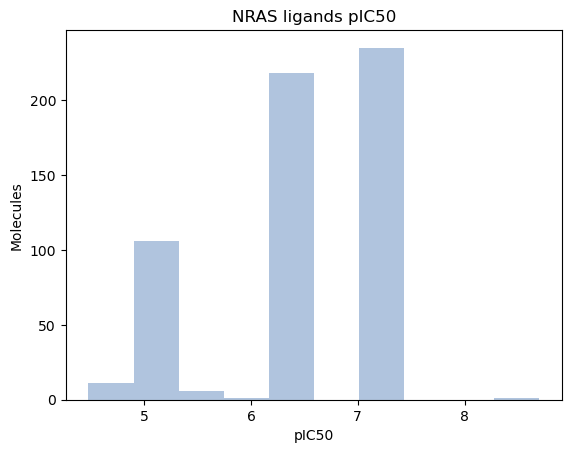

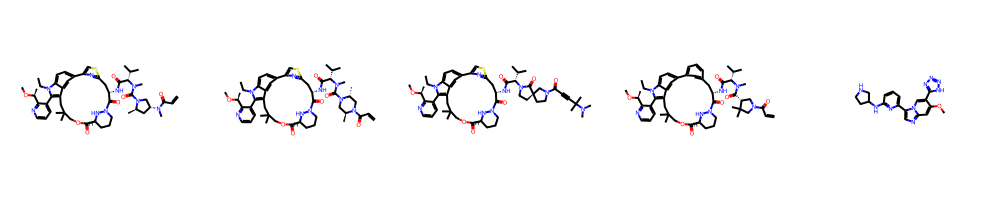

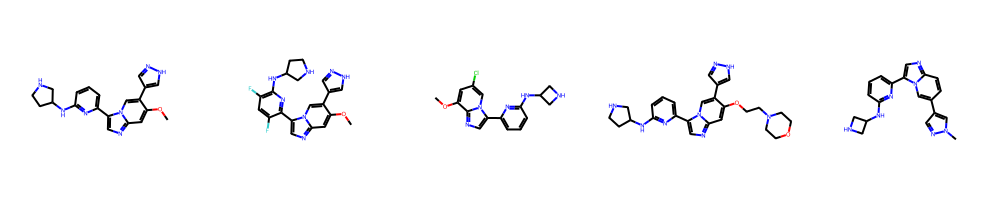

                                               SMILES      Formula  \
0     COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cn[nH]c1    C20H21N7O   
10  COc1cc2ncc(-c3nc(NC4CCNC4)c(F)cc3F)n2cc1-c1cn[...  C20H19F2N7O   
18            COc1cc(Cl)cn2c(cnc12)-c1cccc(NC2CNC2)n1  C16H16ClN5O   
16  C(CN1CCOCC1)Oc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc...   C25H30N8O2   
20       Cn1cc(cn1)-c1ccc2ncc(-c3cccc(NC4CNC4)n3)n2c1     C19H19N7   

    Molecular weight    LogP  H-bond donor  H-bond acceptor    TPSA  \
0         375.180758  2.5688             3                7   92.16   
10        411.161915  2.8470             3                7   92.16   
18        329.104338  2.4420             2                6   63.48   
16        474.249172  2.2712             3                9  104.63   
20        345.170194  2.1805             2                7   72.07   

    Rotatable bonds     IC50     IC50M     pIC50  
0                 5  33170.0  0.000033  4.479255  
10                5  29760.0  0.000030  4.526367  

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el histograma
fig, ax = plt.subplots()
ax.hist(df['pIC50'], color = "lightsteelblue")

# Personalizar el histograma (opcional)
plt.title('NRAS ligands pIC50')
plt.xlabel('pIC50')
plt.ylabel('Molecules')

# Mostrar el histograma
plt.show()

from rdkit.Chem import Draw

# Sort by pic50
df_pic50 = df.sort_values(by='pIC50')

# end two molecules
end_smiles = df_pic50['SMILES'].tail(5)

mol_list = [Chem.MolFromSmiles(smiles) for smiles in end_smiles]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)

# end two molecules
first_smiles = df_pic50['SMILES'].head(5)

mol_list = [Chem.MolFromSmiles(smiles) for smiles in first_smiles]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)

print(df_pic50.head(5))
print(df_pic50.tail(6))


In [ ]:
df.to_csv('../Data/Dataset_pos_pIC50.csv', index=False)